In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
openRest = pd.read_csv('raw_data\Open_Restaurant_Applications.csv')

#### Initial review / EDA of open restaurant application data

In [3]:
openRest.columns

Index(['objectid', 'globalid', 'Seating Interest (Sidewalk/Roadway/Both)',
       'Restaurant Name', 'Legal Business Name', 'Doing Business As (DBA)',
       'Building Number', 'Street', 'Borough', 'Postcode', 'Business Address',
       'Food Service Establishment Permit #', 'Sidewalk Dimensions (Length)',
       'Sidewalk Dimensions (Width)', 'Sidewalk Dimensions (Area)',
       'Roadway Dimensions (Length)', 'Roadway Dimensions (Width)',
       'Roadway Dimensions (Area)', 'Approved for Sidewalk Seating',
       'Approved for Roadway Seating', 'Qualify Alcohol', 'SLA Serial Number',
       'SLA License Type', 'Landmark District or Building',
       'landmarkDistrict_terms', 'healthCompliance_terms',
       'Time of Submission', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [4]:
# total number of applications in the dataset
len(openRest)

14107

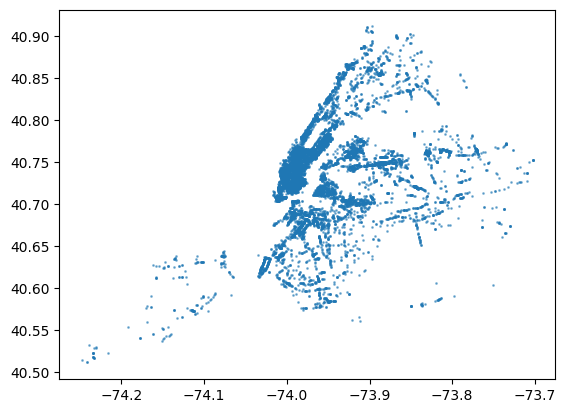

In [5]:
# plot open restaurant lat / long on scatter plot to visualize locations
plt.scatter(openRest.Longitude, openRest.Latitude, s=1, alpha=0.5)
plt.show()

In [6]:
openRest.describe()

,objectid,Postcode,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,14107.000000,14107.000000,11846.000000,11846.000000,11846.000000,8921.000000,8921.000000,8921.000000,12800.000000,12800.000000,12800.000000,12800.000000,12800.00000,1.270500e+04,1.270500e+04
mean,7105.283193,10596.328419,33.079014,10.161067,375.400895,30.893061,8.213989,260.649927,40.733398,-73.953725,5.219062,17.240313,2921.94875,2.254158e+06,2.199482e+09
std,4091.132364,928.416157,34.703304,6.970036,935.476247,26.872615,3.386939,404.064198,0.056207,0.059408,3.636028,15.280160,12793.37202,1.310051e+06,1.275197e+09
min,32.000000,7002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.511019,-74.248014,1.000000,1.000000,1.00000,1.000000e+06,0.000000e+00
25%,3561.500000,10016.000000,16.000000,6.000000,108.000000,18.000000,8.000000,130.000000,40.707434,-73.990246,2.000000,3.000000,69.00000,1.025043e+06,1.008430e+09
50%,7103.000000,10305.000000,24.000000,8.000000,208.000000,24.000000,8.000000,192.000000,40.734779,-73.970380,5.000000,11.000000,151.00000,2.005556e+06,2.025060e+09
75%,10639.500000,11220.000000,40.000000,13.000000,400.000000,36.000000,8.000000,296.000000,40.761872,-73.925257,7.000000,33.000000,470.25000,3.222229e+06,3.056580e+09
max,14194.000000,91206.000000,1000.000000,50.000000,50000.000000,1000.000000,50.000000,25000.000000,40.911190,-73.702668,81.000000,51.000000,157903.00000,5.169029e+06,5.080430e+09


In [7]:
# plot range of open restaurant application submissions 
fig = px.histogram(openRest, x="Time of Submission",marginal="box")
fig.show()

In [8]:
# plot range of sidewalk area ranges
fig = px.histogram(openRest, x="Sidewalk Dimensions (Area)",marginal="box")
fig.show()

In [9]:
# plot range of roadway area ranges
fig = px.histogram(openRest, x="Roadway Dimensions (Area)",marginal="box")
fig.show()

#### Initial Cleaning of dataset
Initial cleaning of dataset consists of converting date columns to datetime, removing irreleviant features, and filtering dataset for rows with missing data. 

In [10]:
# convert date data to datetime
openRest['Time of Submission'] = pd.to_datetime(openRest['Time of Submission'])

In [11]:
# drop rows that don't have any lat / long
openRest.dropna(subset=['Latitude'], inplace=True)

In [12]:
# if you qualify for alcohol you have a SLA license, so we don't need both columns
openRest[openRest['Qualify Alcohol'] == 'no']['SLA License Type'].unique()

array([nan], dtype=object)

In [13]:
# drop irrelevant columns
openRest = openRest.copy()
openRest = openRest.drop(['objectid', 'globalid', 'Food Service Establishment Permit #',
       'Restaurant Name', 'Legal Business Name', 'Doing Business As (DBA)', 'Seating Interest (Sidewalk/Roadway/Both)',
       'Building Number', 'Street', 'Borough', 'Business Address', 'healthCompliance_terms', 'SLA Serial Number',
       'SLA License Type', 'Landmark District or Building', 'landmarkDistrict_terms','Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Latitude', 'Longitude', 'Time of Submission'], axis=1)
openRest

,Postcode,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
0,10028,NaN,NaN,NaN,10.0,8.0,80.0,no,yes,yes
1,10026,47.0,3.0,141.0,NaN,NaN,NaN,yes,no,yes
2,10065,8.0,8.0,64.0,NaN,NaN,NaN,yes,no,no
3,10011,NaN,NaN,NaN,44.0,8.0,352.0,no,yes,yes
4,10002,NaN,NaN,NaN,22.0,8.0,176.0,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...
14102,11356,22.0,4.0,88.0,22.0,8.0,176.0,yes,yes,yes
14103,11220,26.0,7.0,182.0,26.0,8.0,208.0,yes,yes,no
14104,10007,25.0,14.0,350.0,NaN,NaN,NaN,yes,no,yes
14105,10003,10.0,10.0,100.0,NaN,NaN,NaN,yes,no,no


In [14]:
# if you're approved for sidewalk seating, you might not have dimensions associated.
# therefore, the number if restaurants approved for sidewalk seating might not equal the number that have sidewalk seating

temp = openRest[openRest['Approved for Sidewalk Seating'] == 'yes']
print(len(temp[temp['Sidewalk Dimensions (Area)'] == 0]))
temp[temp['Sidewalk Dimensions (Area)'] == 0]

20


,Postcode,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
315,11201,0.0,0.0,0.0,30.0,8.0,240.0,yes,yes,no
494,10003,0.0,0.0,0.0,50.0,8.0,400.0,yes,yes,yes
631,10018,0.0,0.0,0.0,40.0,8.0,320.0,yes,yes,no
850,10065,18.0,0.0,0.0,18.0,8.0,144.0,yes,yes,no
3239,11205,9.0,0.0,0.0,NaN,NaN,NaN,yes,no,no
3329,10003,0.0,0.0,0.0,50.0,8.0,400.0,yes,yes,yes
4901,10013,0.0,0.0,0.0,35.0,8.0,280.0,yes,yes,no
6171,10040,18.0,0.0,0.0,14.0,4.0,56.0,yes,yes,yes
6334,10014,0.0,0.0,0.0,16.0,7.0,112.0,yes,yes,no
6626,11201,0.0,0.0,0.0,20.0,8.0,160.0,yes,yes,yes


In [15]:
temp = openRest[openRest['Approved for Roadway Seating'] == 'yes']
print(len(temp[temp['Roadway Dimensions (Area)'] == 0]))
temp[temp['Roadway Dimensions (Area)'] == 0]

23


,Postcode,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
127,10024,30.0,10.0,300.0,0.0,0.0,0.0,yes,yes,yes
474,10012,15.0,3.0,45.0,0.0,0.0,0.0,yes,yes,no
1377,10025,50.0,6.0,300.0,0.0,0.0,0.0,yes,yes,yes
1575,11235,68.0,33.0,2244.0,0.0,0.0,0.0,yes,yes,yes
2554,10021,NaN,NaN,NaN,0.0,0.0,0.0,no,yes,yes
3001,11473,45.0,10.0,450.0,0.0,0.0,0.0,yes,yes,yes
4277,11414,115.0,17.0,1955.0,0.0,0.0,0.0,yes,yes,no
4417,11372,17.0,15.0,255.0,0.0,0.0,0.0,yes,yes,no
5184,10014,12.0,6.0,72.0,0.0,0.0,0.0,yes,yes,yes
5313,11238,47.0,8.0,376.0,0.0,0.0,0.0,yes,yes,yes


#### Feature Engineering / Processing Dataset

In [16]:
processed_openRest = openRest.copy()

# change yes/no to 1/0 for three categorical columns
processed_openRest['Approved for Sidewalk Seating'] = processed_openRest['Approved for Sidewalk Seating'].map(dict(yes=1, no=0))
processed_openRest['Approved for Roadway Seating'] = processed_openRest['Approved for Roadway Seating'].map(dict(yes=1, no=0))
processed_openRest['Qualify Alcohol'] = processed_openRest['Qualify Alcohol'].map(dict(yes=1, no=0))
processed_openRest

,Postcode,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
0,10028,NaN,NaN,NaN,10.0,8.0,80.0,0,1,1
1,10026,47.0,3.0,141.0,NaN,NaN,NaN,1,0,1
2,10065,8.0,8.0,64.0,NaN,NaN,NaN,1,0,0
3,10011,NaN,NaN,NaN,44.0,8.0,352.0,0,1,1
4,10002,NaN,NaN,NaN,22.0,8.0,176.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14102,11356,22.0,4.0,88.0,22.0,8.0,176.0,1,1,1
14103,11220,26.0,7.0,182.0,26.0,8.0,208.0,1,1,0
14104,10007,25.0,14.0,350.0,NaN,NaN,NaN,1,0,1
14105,10003,10.0,10.0,100.0,NaN,NaN,NaN,1,0,0


In [17]:
processed_openRest_avg = processed_openRest.groupby(by='Postcode').mean()

processed_openRest_sum = processed_openRest.groupby(by='Postcode').sum()
processed_openRest_sum

,Sidewalk Dimensions (Length),Sidewalk Dimensions (Width),Sidewalk Dimensions (Area),Roadway Dimensions (Length),Roadway Dimensions (Width),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
Postcode,,,,,,,,,
10001,5951.0,1708.0,63357.0,5076.0,1275.0,42573.0,198,156,173
10002,6800.0,1878.0,56960.0,5743.0,1777.0,45272.0,236,226,223
10003,14352.0,4397.0,151032.0,11718.0,2953.0,105464.0,440,364,381
10004,1304.0,439.0,12447.0,1440.0,247.0,11540.0,39,32,34
10005,625.0,226.0,9498.0,262.0,70.0,2097.0,22,9,10
...,...,...,...,...,...,...,...,...,...
11691,30.0,13.0,390.0,0.0,0.0,0.0,1,0,0
11692,0.0,0.0,0.0,26.0,8.0,208.0,0,1,0
11693,156.0,47.0,902.0,330.0,70.0,2620.0,7,9,6


#### Create CSV

In [20]:
from pathlib import Path  
filepath = Path('processed_data/open_restaurant_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
processed_openRest_sum.to_csv(filepath)  

processed_openRest_sum.to_csv(filepath)